<a href="https://colab.research.google.com/github/annemiekvdleest/Machine_Learning/blob/main/ML_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- look at the statistics of the data (df. describe or something)
- are the data on the same scale (normalizations)
- think about the model space H discussed in class
- browse a bit for which model would work better for the attributes of the data given
- the bias-variance tradeoff
- how can we select the appropriate features
- how best to deal with the nans. 
- coverage, recall, precision

It's always a good idea to have a baseline like autoML then you know what scores you have to improve
https://machinelearningmastery.com/automl-libraries-for-python/


The goal of the Assignment is to predict customers engagement based on certain parameters/features.
0 class means the deals has not started, 1 means in progress and 2 means done/closed 

# Become one with the data
- look at distribution and patterns
- data imbalances and biases
- How much variation is there and what form does it take? What variation is spurious and could be preprocessed out?
- Does spatial position matter or do we want to average pool it out? How much does detail matter and how far could we afford to downsample the images? How noisy are the labels?
- search/filter/sort by whatever you can think of (e.g. type of label, size of annotations, number of annotations, etc.) and visualize their distributions and the outliers along any axis

In [1]:
!sudo apt-get install build-essential swig
!pip install auto-sklearn==0.11.1
!pip install --force-reinstall scipy==1.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,444 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (T

In [42]:
#import
import pandas as pd
import numpy as np
import matplotlib as plt
import autosklearn 
import scipy
import seaborn as sns
print('autosklearn: %s' % autosklearn.__version__)
print('autosklearn: %s' % scipy.__version__)

autosklearn: 0.11.1
autosklearn: 1.6.0


# Data Visualization

In [43]:
df = pd.read_csv('train_data.csv')
df.head(10)

,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose,target
0,15427464874523186,2,11,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,23.0,23.0,0.0,4,28,2
1,15427464874523186,9,11,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,17.0,4,21,2
2,53852196172413351,11,10,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,0.0,4,11,2
3,63848905825323247,25,7,2021,NaN,NaN,0.000000,NaN,NaN,81.1167,...,True,True,False,1.0,40.0,12.0,-5.0,3,5,2
4,63848905825323247,1,8,2021,NaN,NaN,6.128259,NaN,283.769836,NaN,...,True,False,False,0.0,40.0,40.0,0.0,3,-1,2
5,68542548700621736,16,1,2021,NaN,1.60,7.257180,NaN,553.204638,182.9300,...,True,False,False,0.0,23.0,23.0,0.0,1,63,2
6,68542548700621736,23,1,2021,NaN,0.03,5.000000,0.03,582.793256,0.0300,...,True,False,False,0.0,23.0,23.0,0.0,1,6,2
7,68542548700621736,30,1,2021,NaN,0.03,0.000000,0.03,NaN,0.0300,...,True,False,False,0.0,23.0,23.0,0.0,1,6,2
8,68542548700621736,6,2,2021,NaN,0.03,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,17.0,1,2,2
9,68754075571869139,4,12,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,0.0,4,-1,2


In [30]:
df.describe()

,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,sort_order_at_time_of_weekstart,opportunity_probability_at_time_of_weekstart,opportunity_amount_at_time_of_weekstart,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose,target
count,1.593000e+03,1593.000000,1593.000000,1593.000000,82.000000,741.000000,1593.000000,406.000000,495.000000,410.000000,...,1593.000000,1593.000000,1593.000000,1531.000000,1593.000000,1593.000000,1587.000000,1593.000000,1593.000000,1593.000000
mean,4.375875e+18,16.441933,7.168236,2020.433773,1166.524741,30.787129,1.507096,44.678101,520.202313,53.721934,...,7.887633,64.271814,31661.205500,0.182887,28.906466,26.104834,3.315060,2.686127,49.006905,1.492781
std,2.493243e+18,8.594175,3.201259,0.820307,353.240320,71.173149,3.946708,102.548239,212.808827,102.993282,...,6.810652,34.871041,51178.210159,0.513091,10.251028,10.825346,7.561203,1.054145,63.328840,0.748603
min,1.542746e+16,1.000000,1.000000,2018.000000,380.783692,0.030000,0.000000,0.030000,89.957209,0.030000,...,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,-34.000000,1.000000,-14.000000,0.000000
25%,2.454665e+18,9.000000,5.000000,2020.000000,1023.139097,0.030000,0.000000,0.030000,371.625179,0.030000,...,1.000000,30.000000,10000.000000,0.000000,21.000000,17.000000,0.000000,2.000000,9.000000,1.000000
50%,3.809525e+18,17.000000,7.000000,2021.000000,1124.465757,0.060000,0.000000,1.320000,496.952746,2.310000,...,6.000000,75.000000,15000.000000,0.000000,32.000000,27.000000,0.000000,3.000000,25.000000,2.000000
75%,6.652569e+18,24.000000,10.000000,2021.000000,1376.184766,23.605000,0.000000,29.420000,676.483240,60.130000,...,15.000000,95.000000,37800.000000,0.000000,40.000000,34.000000,8.000000,4.000000,62.000000,2.000000
max,9.207329e+18,31.000000,12.000000,2021.000000,1914.532783,609.600000,38.000000,755.082000,1178.973296,623.117000,...,18.000000,100.000000,728750.000000,2.000000,40.000000,40.000000,32.000000,4.000000,327.000000,2.000000


In [31]:
df.sample(5)

,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose,target
838,3935342692601103027,17,2,2021,NaN,4.840,0.000000,4.840,NaN,NaN,...,True,False,False,0.0,8.0,8.0,0.0,1,37,2
1466,8299218496253766837,21,6,2019,NaN,489.516,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,35.0,35.0,0.0,2,9,2
456,2580629492988543527,2,10,2020,NaN,NaN,0.000000,21.775,NaN,NaN,...,True,False,False,0.0,30.0,30.0,0.0,4,89,2
251,1871951307649906665,24,9,2021,NaN,0.060,7.318166,19.940,411.413743,NaN,...,True,True,False,1.0,40.0,23.0,9.0,3,6,2
683,3444474104507552926,26,5,2020,NaN,26.360,0.000000,26.360,263.817847,NaN,...,True,False,False,0.0,23.0,23.0,0.0,2,127,0


2    1032
1     314
0     247
Name: target, dtype: int64


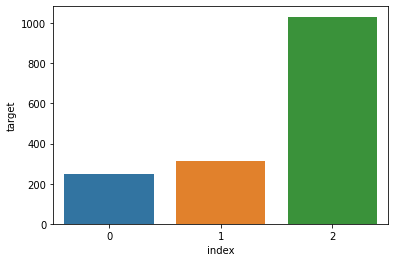

In [46]:
xx = df['target'].value_counts()
print(xx)
sns.barplot(x = 'index', y = 'target', data = xx.reset_index())

As can be seen in the plot above, the dataset is quite unbalanced. This is something that should be taken into account in further processing steps.

# Missing Values

In [18]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

opportunity_id                                                          0
current_date_day                                                        0
current_date_month                                                      0
current_date_year                                                       0
TOPICS__mean_calls_Integration__from_opp_creation                    1511
TOPICS__min_calls_Library__last_28_days                               852
QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days       0
TOPICS__min_calls_Collaboration__from_current_stage_start            1187
TOPICS__std_calls_Integrations__last_7_days                          1098
TOPICS__min_calls_Evaluation_Process__from_current_stage_start       1183
dtype: int64

In [19]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print((total_missing/total_cells) * 100, "%")

56.96160327990977 %


As we can see above, there are a lot of missing values. 

There are many columns with NaN. If we delete the columns that contain NaNs, then there is almost nothing left. Therefore, we have to deal with those missing values. 

# What to do with NaN + feature selection method



Steps:
- filling NaNs with zeros or ffill
- normalization
- feature selection method



> Now, I just filled NaNs with zeros and picked a feature importance method. It would be good to experiment with this and see how it changes the accuracy / loss. Took largest 50, can also play with this.




In [32]:
# Fill NaNs
df = df.fillna(0) 
# df.fillna(method = 'bfill', axis=0).fillna(0)

In [33]:
# features and labels
X = df.iloc[:,:-1]
y = df.iloc[:,len(df.columns)-1] # y should not be normalized
print(y)

0       2
1       2
2       2
3       2
4       2
       ..
1588    0
1589    0
1590    0
1591    0
1592    2
Name: target, Length: 1593, dtype: int64


In [25]:
# auto ML (only replaced NaNs)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from autosklearn.classification import AutoSklearnClassifier
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define search
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
# perform the search
model.fit(X_train, y_train)
# summarize
print(model.sprint_statistics())
# evaluate best model
y_hat = model.predict(X_test)
print(y_test)
print(y_hat)
recall = recall_score(y_test, y_hat)
print("Recall: %.3f" % recall)

# We can define an AutoSklearnClassifier class that controls the search and configure it to run for two minutes (120 seconds) 
# and kill any single model that takes more than 30 seconds to evaluate. At the end of the run, we can report the statistics 
# of the search and evaluate the best performing model on a holdout dataset.
# https://machinelearningmastery.com/automl-libraries-for-python/ 
# Restart runtime after installations! 

auto-sklearn results:
  Dataset name: 139ea991d88e4d90596d5ccbc21be9cf
  Metric: accuracy
  Best validation score: 0.733711
  Number of target algorithm runs: 24
  Number of successful target algorithm runs: 1
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 19
  Number of target algorithms that exceeded the memory limit: 3

75      2
698     1
839     2
1485    2
1006    2
       ..
216     0
674     2
395     1
1227    2
503     1
Name: target, Length: 526, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

ValueError: ignored

In [34]:
# Normalization is useful when your data has varying scales and the algorithm you are using 
# does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

from sklearn import preprocessing 
scaler = preprocessing.MinMaxScaler()
col = X.columns
d = scaler.fit_transform(X)
scaled_X = pd.DataFrame(d, columns=col) #transform back to dataframe
scaled_X.head()

# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# normalization -> kNN 


,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,opportunity_amount_at_time_of_weekstart,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose
0,0.000000,0.033333,0.909091,1.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.026014,0.0,0.0,0.0,0.6,0.575,0.575,0.515152,1.000000,0.123167
1,0.000000,0.266667,0.909091,1.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.058243,0.0,0.0,0.0,0.6,1.000,1.000,0.772727,1.000000,0.102639
2,0.004180,0.333333,0.818182,1.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.001673,0.0,0.0,0.0,0.6,1.000,1.000,0.515152,1.000000,0.073314
3,0.005268,0.800000,0.545455,1.0,0.0,0.0,0.00000,0.0,0.000000,0.130179,...,0.013448,0.0,1.0,0.0,0.8,1.000,0.300,0.439394,0.666667,0.055718
4,0.005268,0.000000,0.636364,1.0,0.0,0.0,0.16127,0.0,0.240692,0.000000,...,0.013477,0.0,0.0,0.0,0.6,1.000,1.000,0.515152,0.666667,0.038123


In [25]:
# auto ML scaled data
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=1)
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
model.fit(X_train, y_train)
print(model.sprint_statistics())
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)

auto-sklearn results:
  Dataset name: 1c129590908bfacce9d5dd542166bf19
  Metric: accuracy
  Best validation score: 0.722380
  Number of target algorithm runs: 23
  Number of successful target algorithm runs: 1
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 19
  Number of target algorithms that exceeded the memory limit: 2

Accuracy: 0.751


[0.00221187 0.01073621 0.00471321 ... 0.00248838 0.00506342 0.01009581]


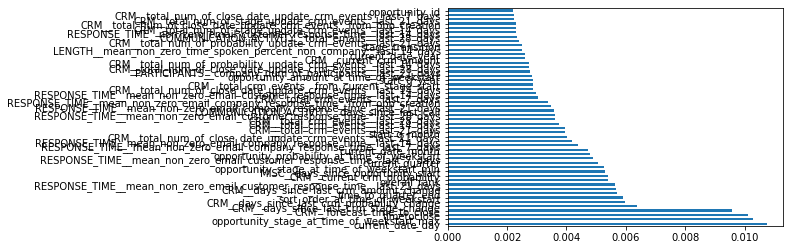

opportunity_id                                       0.002212
current_date_day                                     0.010736
current_date_month                                   0.004713
current_date_year                                    0.002604
TOPICS__mean_calls_Integration__from_opp_creation    0.000060
                                                       ...   
opportunity_stage_at_time_of_weekstart_max           0.010268
opportunity_stage_at_time_of_weekstart_min           0.005252
stage_transition                                     0.002488
current_quarter                                      0.005063
timetoclose                                          0.010096
Length: 2650, dtype: float64


In [35]:
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# feature importance method

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(scaled_X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()
print(feat_importances)

# target values
X_feat = df[feat_importances.nlargest(50).index]



In [36]:
# AutoML normalization - pick features - train auto ML

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.33, random_state=1)
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
model.fit(X_train, y_train)
print(model.sprint_statistics())
y_hat = model.predict(X_test)
print(y_test)
print(y_hat)
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)


auto-sklearn results:
  Dataset name: 3241ebeaf9010c429823dc589712b5f3
  Metric: accuracy
  Best validation score: 0.835694
  Number of target algorithm runs: 22
  Number of successful target algorithm runs: 8
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 14
  Number of target algorithms that exceeded the memory limit: 0

75      2
698     1
839     2
1485    2
1006    2
       ..
216     0
674     2
395     1
1227    2
503     1
Name: target, Length: 526, dtype: int64
[2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 0 0 2 2 1 2
 2 2 2 2 2 2 2 2 0 2 0 2 1 2 2 0 2 2 2 1 1 2 2 1 2 2 0 2 1 2 1 2 0 2 2 2 1
 2 2 1 1 2 2 2 2 0 2 2 2 1 0 2 2 2 2 2 0 0 2 1 1 2 2 1 1 1 1 2 2 2 1 2 2 2
 2 1 2 2 2 1 2 2 0 2 0 2 0 1 1 0 2 2 2 1 1 2 2 0 2 2 2 1 1 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1
 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 1 0 2 1 0
 2 2 2 2 0 2 1 2 

In [ ]:
# normalize, pick features, train SVM
# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_feat,y, test_size=0.3,random_state=109) # 70% training and 30% test

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
print(y_test)
print(y_pred)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))

# 34m 27s

In [28]:
# NN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feat,y, test_size=0.3,random_state=109)

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

print(y_test)
print(y_pred_test)

from sklearn.metrics import accuracy_score

print('Accuracy traindata')
print(accuracy_score(y_train, y_pred_train))

print('')
print('Accuracy testdata')
print(accuracy_score(y_test, y_pred_test))




197     2
21      0
903     0
1260    0
419     2
       ..
1248    0
254     1
386     0
1050    2
1025    0
Name: target, Length: 478, dtype: int64
[1 0 2 1 2 2 0 2 0 2 2 2 1 2 0 1 2 2 2 2 2 1 2 2 0 1 1 2 2 0 2 2 2 2 0 2 0
 2 2 2 1 2 2 2 2 1 0 2 2 2 1 2 2 1 2 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 0 2 2 2 1 2 2 1 2 1 2 2 0 2 2 2 0 1 1 1 2 2 2 2 2 2 1 2 1 0 1
 2 2 2 1 1 2 2 2 2 2 0 2 1 2 2 2 2 2 2 1 2 0 2 2 2 2 2 1 2 1 2 0 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 1
 2 1 2 2 2 1 2 2 2 2 1 2 1 2 2 2 0 2 1 0 2 2 1 2 2 2 1 1 2 2 1 2 2 1 2 1 2
 2 0 2 2 2 1 0 2 2 1 2 2 0 1 2 2 2 1 1 2 1 2 2 1 1 2 2 2 2 2 2 2 1 0 2 2 1
 2 0 0 2 1 2 2 2 2 2 2 1 0 1 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2 2 2 1 2 2 2 0
 2 2 2 0 2 2 2 0 1 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 0 0 1
 2 0 2 2 0 0 0 2 2 2 2 2 2 2 2 1 2 2 0 2 2 1 2 2 2 2 1 1 2 2 1 0 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 1 1 2 

[0.00176689 0.01246798 0.00416189 ... 0.00205277 0.00458291 0.01242717]


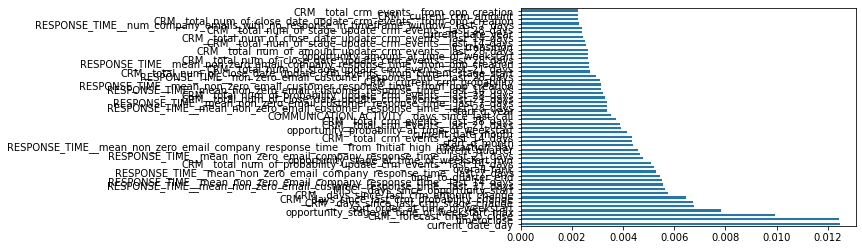

opportunity_id                                       0.001767
current_date_day                                     0.012468
current_date_month                                   0.004162
current_date_year                                    0.002387
TOPICS__mean_calls_Integration__from_opp_creation    0.000081
                                                       ...   
opportunity_stage_at_time_of_weekstart_max           0.007828
opportunity_stage_at_time_of_weekstart_min           0.004758
stage_transition                                     0.002053
current_quarter                                      0.004583
timetoclose                                          0.012427
Length: 2650, dtype: float64
Index(['current_date_day', 'timetoclose', 'CRM__forecast_time_to_close',
       'opportunity_stage_at_time_of_weekstart_max',
       'sort_order_at_time_of_weekstart',
       'CRM__days_since_last_crm_stage_change',
       'CRM__days_since_last_crm_probability_change',
       'CRM__days_s

In [ ]:
# Before: normalize, pick features, train auto ML
# Now: pick features, normalize, train auto ML

df = pd.read_csv('train_data.csv')
df = df.fillna(0)
# pick features
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()
print(feat_importances)

# target values
print(feat_importances.nlargest(50).index)
X_feat = df[feat_importances.nlargest(50).index]
print(X_feat)

# normalize 
scaler = preprocessing.MinMaxScaler()

col = X_feat.columns
d = scaler.fit_transform(X_feat)
scaled_X = pd.DataFrame(d, columns=col) #transform back to dataframe
scaled_X.head()

# train 
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=1)
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
model.fit(X_train, y_train)
print(model.sprint_statistics())
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)


In [ ]:
# check next step recipe site! 

# model : Consider running the example a few times and compare the average outcome

# Set up the end-to-end training/evaluation skeleton + get dumb baselines
- pick some simple model that you couldn’t possibly have screwed up somehow - e.g. a linear classifier, or a very tiny ConvNet
- train it, visualize the losses, any other metrics (e.g. accuracy), model predictions, and perform a series of ablation experiments with explicit hypotheses along the way
- check tips and tricks on website

http://karpathy.github.io/2019/04/25/recipe/

# Overfit + Regularize
- first get a model large enough that it can overfit (i.e. focus on training loss) and then regularize it appropriately (give up some training loss to improve the validation loss)
- check tips and tricks on website

# Tune
- random over grid search
- hyper parameter optimization

# Squeeze out the juice 
- ensembles
- leave it training